# Distribution Functions

## Plotting Distributions

In [71]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
def plot_distribution(data, xlabel):
    ax = sns.distplot(data,
                     kde = False,
                     color = 'skyblue',
                     hist_kws = {'linewidth': 15, 'alpha': 1})
    ax.set(xlabel = xlabel, ylabel='Frequency')
    return ax

## Uniform Distribution

Every value between an interval from a to b is equally likely to be chosen.  
P(obtain value between x1 and x2)  =  (x2 – x1) / (b – a)  

scipy.stats.uniform(x, loc, scale)  

where:

x: The value of the uniform distribution  
loc: The minimum possible value  
loc + scale: The maximum possible value  

In [3]:
from scipy.stats import uniform

/Users/nishapardeshi/virtualenvs/jupyter/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


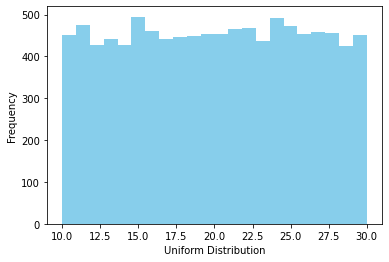

In [4]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
plot_distribution(data_uniform, 'Uniform Distribution')

Example 1  
Suppose a bus shows up at a bus stop every 20 minutes. If you arrive at the bus stop, what is the probability that the bus will show up in 8 minutes or less? 


In [5]:
# P(X > 0 and X <= 8)
loc = 0
mu = 20
uniform.cdf(x=8, loc=loc, scale=mu) - uniform.cdf(x=0, loc=loc, scale=mu)

0.4

Example 2  
The weight of a certain species of frog is uniformly distributed between 15 and 25 grams. If you randomly select a frog, what is the probability that the frog weighs between 17 and 19 grams?

In [6]:
# loc - min possible value = 15, scale = max-loc 

loc = min(15, 25, 17, 19)
scale = max(15, 25, 17, 19) - loc
uniform.cdf(x=19, loc=loc, scale=scale) - uniform.cdf(x=17, loc=loc, scale=scale)

0.2

Example 3  
The length of an NBA game is uniformly distributed between 120 and 170 minutes. What is the probability that a randomly selected NBA game lasts more than 150 minutes?

In [7]:
# P(X > 150) and P(X <= 170)
loc = min(120, 170)
scale = max(120, 170) - loc
uniform.cdf(x=170, loc=loc, scale=scale) - uniform.cdf(x=150, loc=loc, scale=scale)

0.4

## Bernoulli Trial

Fixed p success

In [8]:
from scipy.stats import bernoulli

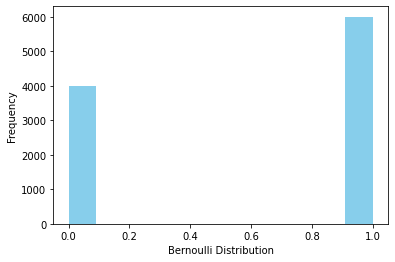

In [9]:
p = 0.6
n = 10000
# rvs is basically to generate random numbers
data_bernoulli = bernoulli.rvs(size = n, p = p)
plot_distribution(data_bernoulli, 'Bernoulli Distribution')


In [10]:
# First Four moments
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  0.6  var:  0.24  skew:  -0.4082482904638634  kurt:  -1.8333333333333308


In [11]:
# probability mass function (pmf)
bernoulli.pmf(n, p)

0.0

In [12]:
# Cumulative Distribuition Function
bernoulli.cdf(n, p)

1.0

## Binomial Distribution

p success in n attempts  
P(X=k) = nCk * p^k * (1-p)^n-k  
n: number of trials  
k: number of successes  
p: probability of success on a given trial  
nCk: the number of ways to obtain k successes in n trials  

In [13]:
from scipy.stats import binom

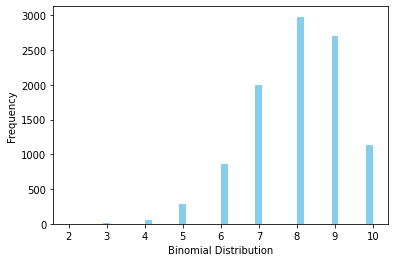

In [14]:
n = 10
y = 10000
p = 0.8
data_binom = binom.rvs(n = n, p = p, size = y)
plot_distribution(data_binom, 'Binomial Distribution')
# As probability is greater than 0.5 the plot skews to the right -> positive skew

In [15]:
# First four moments
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  8.0  var:  1.5999999999999996  skew:  -0.47434164902525705  kurt:  0.02500000000000003


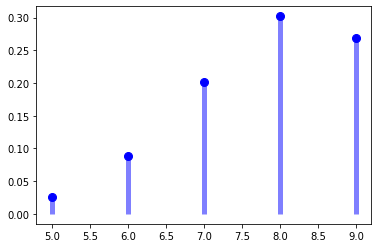

In [16]:
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

Example 1: Probability Equal to Some Value  
Nathan makes 60% of his free-throw attempts.  
If he shoots 12 free throws, what is the probability that he makes exactly 10? 

In [17]:
#calculate binomial probability
# P(X = 10)
n = 12
p = 0.6
binom.pmf(k=10, n=n, p=p)

0.06385228185599987

Example 2: Probability Less than Some Value  
Marty flips a fair coin 5 times. 
What is the probability that the coin lands on heads 2 times or fewer?

In [18]:
# P(X <= 2)
n = 5
p = 0.5
binom.cdf(k=2, n=n, p=p)

0.5

Example 3: Probability Between Some Value  
It is known that 70% of individuals support a certain law. 
If 10 individuals are randomly selected, 
what is the probability that between 4 and 6 of them support the law?

In [19]:
# P(X > 4 and X <= 6)
n = 10
p = 0.7
binom.cdf(k=6, n=n, p=p) - binom.cdf(k=3, n=n, p=p)

0.3397972032000002

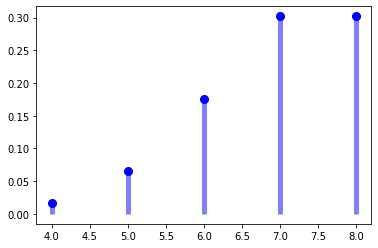

In [20]:
n = 9
p = 0.8

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

## Poisson Distribution

probability of obtaining k successes during a given time interval.  
P(X=k) = λk * e^– λ / k!  
λ: mean number of successes that occur during a specific interval  
k: number of successes  
e: a constant equal to approximately 2.71828  

In [21]:
from scipy.stats import poisson

/Users/nishapardeshi/virtualenvs/jupyter/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


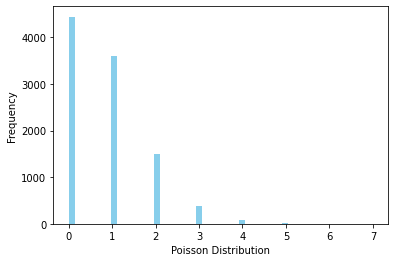

In [22]:
mu = 0.8
y =10000
data_poisson = poisson.rvs(mu = mu, size = y)
plot_distribution(data_poisson, 'Poisson Distribution')

In [23]:
# First four moments
mean, var, skew, kurt = poisson.stats(mu=mu, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  0.8  var:  0.8  skew:  1.118033988749895  kurt:  1.25


Example 1: Probability Equal to Some Value  
A store sells 3 apples per day on average.  
What is the probability that they will sell 5 apples on a given day?   

In [24]:
# P(X = 5)
n = 5
mu = 3
poisson.pmf(k=n, mu=mu)

0.10081881344492458

Example 2: Probability Less than Some Value  
A certain store sells seven footballs per day on average. What is the probability that this store sells four or less footballs in a given day?

In [25]:
# P(X <= 4)
n = 4
mu = 7
poisson.cdf(k=n, mu=mu)

0.17299160788207146

Example 3: Probability Greater than Some Value  
A certain store sells 15 cans of tuna per day on average. 
What is the probability that this store sells more than 20 cans of tuna in a given day?

In [26]:
# P(X > 20) = 1 - P(X <= 20)
n = 20
mu =15
1 - poisson.cdf(k=n, mu=mu)

0.08297091003146029

## Exponential Distribution

Describes the time between events in a Poisson point process  
The exponential distribution also has a memoryless property, which means the probability of some future event occurring is not affected by the occurrence of  past events.    

In [27]:
from scipy.stats import expon

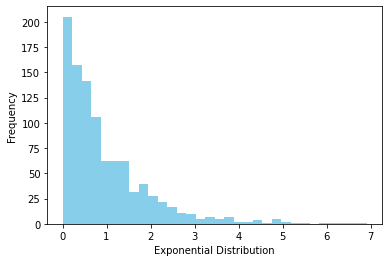

In [28]:
mu = 1
scale = 1/mu
n = 1000
loc = 0

data_expon = expon.rvs(scale=mu,loc=loc,size=n)
plot_distribution(data_expon, 'Exponential Distribution')

In [29]:
# First four moments
mean, var, skew, kurt = expon.stats(scale=mu,loc=loc, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  1.0  var:  1.0  skew:  2.0  kurt:  6.0


Question 1: A new customer enters a shop every two minutes, on average. 
After a customer arrives, find the probability that a new customer arrives in less than one minute.

In [30]:
# P(X <= 1)
mu = 2
scale = 1/mu
loc = 0
n = 1
expon.cdf(x=n, scale=mu)

0.3934693402873666

Question 2: An earthquake occurs every 400 days in a certain region, on average. After an earthquake occurs, find the probability that it will take more than 500 days for the next earthquake to occur.

In [31]:
# P(X > 500) = 1 - P(X <= 500)
mu = 400
scale = 1/mu
loc = 0
n =500
1 - expon.cdf(x=n, scale=mu)

0.28650479686019015

Question 3: A call center receives a new call every 10 minutes, on average. After a customer calls, find the probability that a new customer calls within 10 to 15 minutes.

In [32]:
# P(X > 10 and X <= 15)
mu = 10
scale = 1/mu
loc = 0
expon.cdf(x=15, scale=mu) - expon.cdf(x=10, scale=mu)

0.14474928102301254

## Gamma Distribution

Used to model probabilities related to waiting times.  
When a is an integer, gamma reduces to the Erlang distribution, and when a=1 to the exponential distribution.

In [33]:
from scipy.stats import gamma

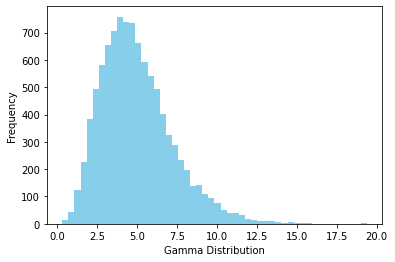

In [34]:
a = 5
n = 10000
data_gamma = gamma.rvs(a = a, size = n)
plot_distribution(data_gamma, 'Gamma Distribution')

In [35]:
# First four moments
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  5.0  var:  5.0  skew:  0.8944271909999159  kurt:  1.2


## Normal Distribution

Continuous random variable whose probability distribution defines standard bell shape curve.  


In [36]:
from scipy.stats import norm

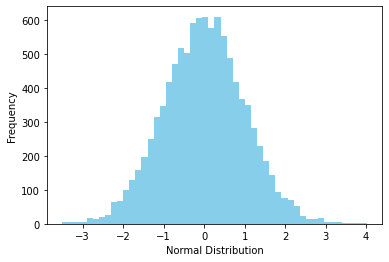

In [37]:
# loc - mean, scale - sd, size = n
n = 10000
std = 1
mu = 0
data_norm = norm.rvs(scale = std, loc = mu, size = n)
plot_distribution(data_norm, 'Normal Distribution')

In [38]:
# First four moments
mean, var, skew, kurt = norm.stats(scale=std,loc=mu, moments='mvsk')
print('mean: ',mean, ' var: ',var ,' skew: ',skew, ' kurt: ', kurt)

mean:  0.0  var:  1.0  skew:  0.0  kurt:  0.0


In [39]:
# P(X > 5000) = 1 - P(X<= 5000)
x = 5000
std = 738
mu = 4066
1 - norm.cdf(x = x, scale = std, loc = mu)

0.10283126942687137

## Validate data comes from a normal distribution  
ShapiroResult(statistic=0.9958659410, pvalue=0.8669294714)

In [40]:
from scipy.stats import shapiro

In [41]:
shapiro(data_norm)
# p-value of the test turns out to be 0.8984780311584473. Since this value is not less than .05, 
# fail to reject null hypothesis
# we can assume the sample data comes from a population that is normally distributed.

/Users/nishapardeshi/virtualenvs/jupyter/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997916221618652, 0.4607335031032562)

Three reasons for shape to affect normality.  
Multi mode distribution.  
Data is skewed.  
Outliers.  

(array([0.00201094, 0.01307111, 0.02714769, 0.04323521, 0.01608752,
        0.02513675, 0.02111487, 0.03116957, 0.01407658, 0.00804376]),
 array([-4.76910177,  0.20369681,  5.17649539, 10.14929398, 15.12209256,
        20.09489114, 25.06768973, 30.04048831, 35.01328689, 39.98608548,
        44.95888406]),
 <a list of 10 Patch objects>)

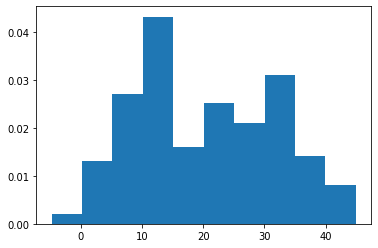

In [42]:
# Creating multi model distribution
n = 100
x1 = norm.rvs(scale = 5, loc = 10, size = n)
x2 = norm.rvs(scale = 7, loc = 30, size = n)
x = np.concatenate((x1, x2))
plt.hist(x, density=True)

(array([525., 232., 125.,  60.,  23.,  14.,  10.,   5.,   2.,   4.]),
 array([2.69980283e-04, 6.91972233e-01, 1.38367449e+00, 2.07537674e+00,
        2.76707899e+00, 3.45878124e+00, 4.15048350e+00, 4.84218575e+00,
        5.53388800e+00, 6.22559025e+00, 6.91729251e+00]),
 <a list of 10 Patch objects>)

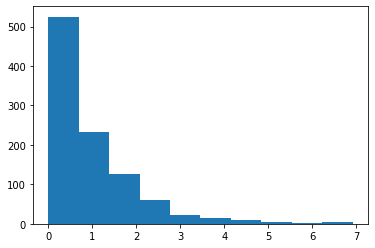

In [43]:
# Skewed data
plt.hist(data_expon)

(array([10., 58., 31.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-4.76910177,  4.20780841, 13.18471858, 22.16162876, 31.13853894,
        40.11544911, 49.09235929, 58.06926947, 67.04617965, 76.02308982,
        85.        ]),
 <a list of 10 Patch objects>)

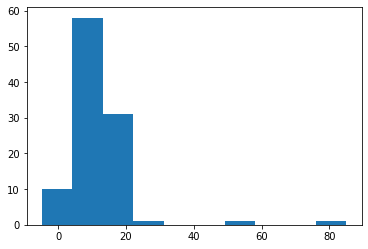

In [44]:
# Add outliers to x1
x3 = np.append(x1,[85, 50])
plt.hist(x3)

In [45]:
# scale the data to check for outliers
from scipy.stats import zscore
zscore(x3)
# we can see outliers have value > 3

array([ 3.65025338e-01,  4.21129948e-01, -5.31589616e-03,  6.20106192e-01,
       -1.20292121e-01, -7.16155034e-01,  7.38728915e-01,  2.01087192e-01,
        6.79316901e-02,  9.68411737e-01,  5.03323460e-01,  8.79529128e-01,
       -6.74669063e-01, -1.97973641e-01,  6.99541003e-01, -1.19668247e-01,
       -4.83772107e-01,  3.12402423e-02,  9.37384677e-01,  1.21618191e-01,
       -2.00962770e-01,  1.24479494e-01, -3.16198195e-02, -1.71474514e+00,
       -3.79737918e-01, -8.60749352e-01, -4.52564343e-01, -8.04624607e-01,
        3.91746225e-01, -7.37284603e-01,  2.47480818e-01, -1.43791720e-01,
        2.09344668e-01, -5.35647375e-01, -4.48337474e-02, -6.31092160e-01,
        1.89948305e-01, -3.81184860e-01,  1.21821148e-01, -1.04646558e-01,
       -5.78069947e-01,  2.46238598e-01, -6.29613023e-01, -1.86904856e-01,
       -7.88669353e-02, -7.56918022e-01,  2.18740586e-01,  1.81344920e-01,
       -6.98285313e-01,  3.14620118e-01,  8.44667940e-02, -1.30079005e-01,
        2.05833569e-01, -

## Normal Quantile Plot

x axis perfect normal quantile value and y axis is data.

In [46]:
import statsmodels.api as sm

In [77]:
def display_qqploy(data):
    return sm.qqplot(data,line='45',fit=True,dist=stats.norm)

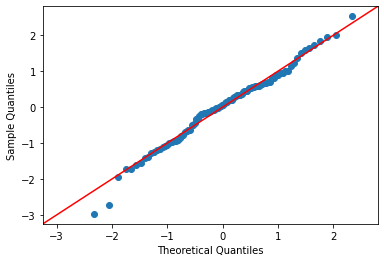

In [79]:
# normal
display_qqploy(x1)
plt.show()

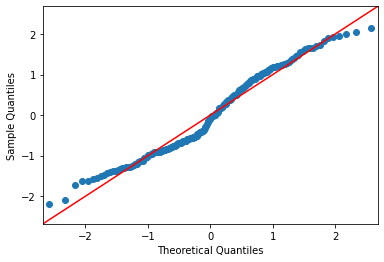

In [80]:
# bi model normal
display_qqploy(x)
plt.show()

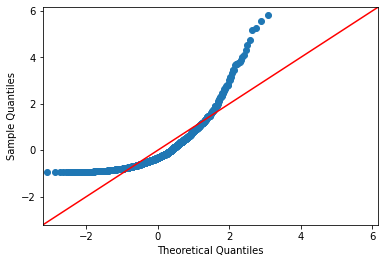

In [81]:
# Exponential
display_qqploy(data_expon)
plt.show()

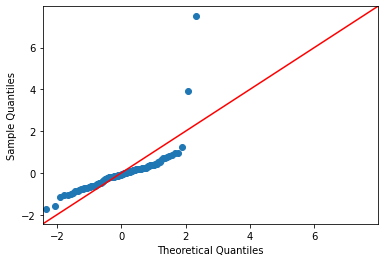

In [82]:
# outliers
display_qqploy(x3)
plt.show()

## Test Normality by skewness - Lack of symmetry


Measure lack of symmetry.  
K3 = 0 for normal data
-2 <= data <= 2 , considered normal. 


In [89]:
from scipy.stats import skew

In [86]:
print('Normal :', skew(x2))
print('BiModel :', skew(x))
print('Exponential :', skew(data_expon))
print('Outliers :', skew(x3))

Normal : -0.16094415981314206
BiModel : 0.18618056631610358
Exponential : 2.130660263981575
Outliers : 4.602112301435585


## Kurtosis - Outliers

K4 = 0 for outliers.  
K4 >= 3, suggest there are outliers

In [91]:
print('Normal :', kurtosis(x2))
print('BiModel :', kurtosis(x))
print('Exponential :', kurtosis(data_expon))
print('Outliers :', kurtosis(x3))

Normal : -0.17035594359943307
BiModel : -0.9975122456720538
Exponential : 6.003676637169336
Outliers : 30.79998946396183


## ZScore

Tells us how many standard deviations away a value is from the mean  
It is unitless, between -3 and 3.  
It is used to standardize the data.  
z = (X – μ) / σ

where:

X is a single raw data value  
μ is the population mean  
σ is the population standard deviation  

scipy.stats.zscore(a, axis=0, ddof=0, nan_policy=’propagate’)  

where:  

a: an array like object containing data  
axis: the axis along which to calculate the z-scores. Default is 0.  
ddof: degrees of freedom correction in the calculation of the standard deviation. Default is 0.  
nan_policy: how to handle when input contains nan. Default is propagate, which returns nan. ‘raise’ throws an error and ‘omit’ performs calculations ignoring nan values.  

In [ ]:
from scipy.stats import zscore

In [ ]:
zscore(data_norm)

In [ ]:
# P(X > 5000) = 1 - P(X<= 5000)
x = 5000
loc = 738
mu = 4066

z = (x - mu)/loc
print('z: ',z, '\n')
print('z is 1.27, so 5000 is above the mean by 1.27 std dev')
1 - norm.cdf(z)


## Quantile Value of Normal Distribution

Question 1: Packaging system fills boxsuch that weight are normally distribuited with mu 16.03 oz and sigma 0.2 oz. 
What weight should mean of process be adjusted, so chance of underweight box iis just 0.005?

In [ ]:
# P(X < 16) = 0.005
# X is normally distributed with sigma = 0.2, we need to find mean
# Convert to zscore as mean =0 and sd = 1
# P(Z < z) = 0.005
x = 16
q = 0.005
loc = 0.2

z = norm.ppf(q = q, loc=0, scale=1)
print('z : ',z)
#z = (x - mu)/sigma
# mu = (x - z*sigma)
mu = x - z * loc
print('mu : ', mu)
# if we hold mean of package rate as 16.5, there is only 0.5% chance to get underweight box.

Question 2: Suppose 1$ million portfolio of investor is expected to average 10\% growth over the next few year with stddev of 30\%.  
What is VaR (Value at risk) using the worst 5\%.

In [ ]:
mean = 10
q = 0.05
std = 30
norm.ppf(q = q, loc=mean, scale=std)

The risk for 5\% worst portfolio value is below -39.35\%. 